In [1]:
from sklearn import datasets
import numpy as np

# Irisデータセットの読み込み（scikit-learnに用意されている）
iris = datasets.load_iris()
# 150個のサンプルの「がく片の長さ」と「花びらの長さ」を特徴行列Xに入れる
X = iris.data[:, [2, 3]]
# 対応する品種クラスラベルをベクトルyに入れる
y = iris.target

# yにどのような値が入っているか、重複なしで出力する
# (Iris-Setosa,Iris-Versicolor,Iris-Virginicaの3種類)
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

# トレーニングデータの平均と標準偏差を計算
sc = StandardScaler()
sc.fit(X_train)

# 平均と標準偏差を用いて標準化する
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron

# エポック数（トレーニング回数）=40、学習率=0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# トレーニングデータをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
# 上記でトレーニングしたパーセプトロンを使用して、テストデータを予測させる
y_pred = ppn.predict(X_test_std)
# 誤分類した件数を表示する。4/45が誤分類。
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [6]:
# 上記でトレーニングしたパーセプトロンを使用して、テストデータを予測させる
y_pred = ppn.predict(X_test_std)
# 誤分類した件数を表示する。4/45が誤分類。
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [7]:
from sklearn.metrics import accuracy_score

# 正解率の表示。91%
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [8]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

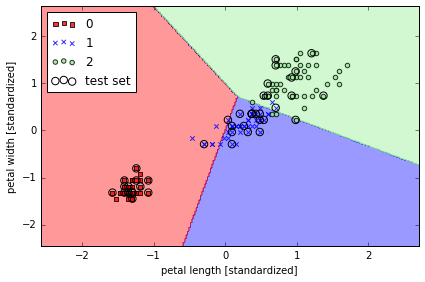

In [9]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の設定
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)

#グラフの表示
plt.show()

Misclassified samples: 1
Accuracy: 0.98


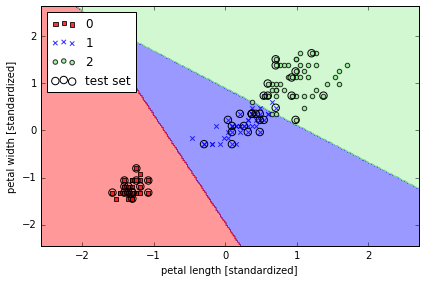

In [10]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=1000.0, random_state=0)
# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)

# 上記でトレーニングしたインスタンスを使用して、テストデータを予測させる
y_pred = lr.predict(X_test_std)
# 誤分類した件数を表示する
print('Misclassified samples: %d' % (y_test != y_pred).sum())
# 正解率の表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例を設定
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)

# グラフを表示
plt.show()

Misclassified samples: 1
Accuracy: 0.98


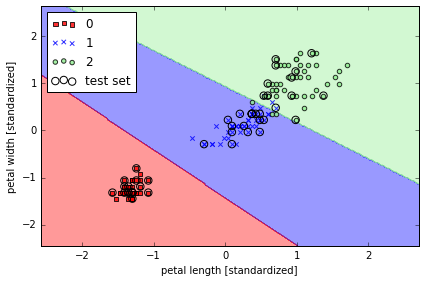

In [11]:
from sklearn.svm import SVC
# 線形SVM（サポートベクトルマシン）のインスタンスを生成
svm = SVC(kernel='linear', C=1.0, random_state=0)
# トレーニングデータをモデルに適合させる
svm.fit(X_train_std, y_train)

# 上記でトレーニングしたインスタンスを使用して、テストデータを予測させる
y_pred = lr.predict(X_test_std)
# 誤分類した件数を表示する
print('Misclassified samples: %d' % (y_test != y_pred).sum())
# 正解率の表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例を設定
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)

# グラフを表示
plt.show()

In [12]:
# 

In [13]:
from sklearn.cross_validation import train_test_split

# トレーニングデータ70％（105個）、テストデータ30％（45個）に分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)